# **K-means**

## 라이브러리와 데이터셋 불러오기



"""
데이터 셋 설명
마우스의 뇌조직에 대한 생화학 마커 포함한 데이터셋

MouseID: 각 마우스에 대한 고유 식별자입니다.
DYRK1A_N부터 Ubiquitin_N까지: 뇌의 다양한 단백질 및 생화학 마커의 정규화된 수준을 나타냅니다.

이 마커들은 각각 신경 전달, 뉴런 성장, 세포 스트레스 반응 등 다양한 생물학적 과정과 경로와 관련이 있습니다.
Genotype: 유전적 배경을 나타냅니다.
Treatment: 약물 치료 여부를 나타냅니다.
Behavior: 마우스의 행동 실험 결과를 나타냅니다.
Class: 마우스가 속한 그룹을 나타냅니다, 예를 들어, 제어군, 치료군 등입니다.

"""

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.8 M

In [3]:
from pycaret.datasets import get_data
from pycaret.clustering import *

In [4]:
data = get_data('mice')
# 데이터가 어떻게 클러스터링 되는지를 살펴보기

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [5]:
# 전처리할 땐 setup 이라는 함수를 이용
clustering_setup = setup(data,
                         normalize=True,
                         ignore_features = ['MouseID'],
                         session_id = 123)
# 거리 기반 알고리즘이기 떄문에 꼭 정규화
# 선형회귀나 클러스터링에서는 꼭 정규화..
# 모델은 식별자의 순서도 학습하므로 식별자, 인덱스도 빼줘야한다.
# 난수를 123으로 고정하는 이유 ?
# 내가 전처리한 데이터값과 조원이 전처리한 데이터값이 다르지 않기 위해

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 88)"
3,Ignore features,1
4,Numeric features,77
5,Categorical features,4
6,Rows with missing values,48.9%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [6]:
kmeans = create_model('kmeans')
# 비지도학습은 compare 모델이 불가능하다.
# 케이민즈 모델 만들고 임의로 학습할거다.

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1192,134.0698,2.1693,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Elbow
- K-평균 군집 분석 알고리즘에서 최적의 클러스터 수를 결정하는 데 사용하는 시각적 기법

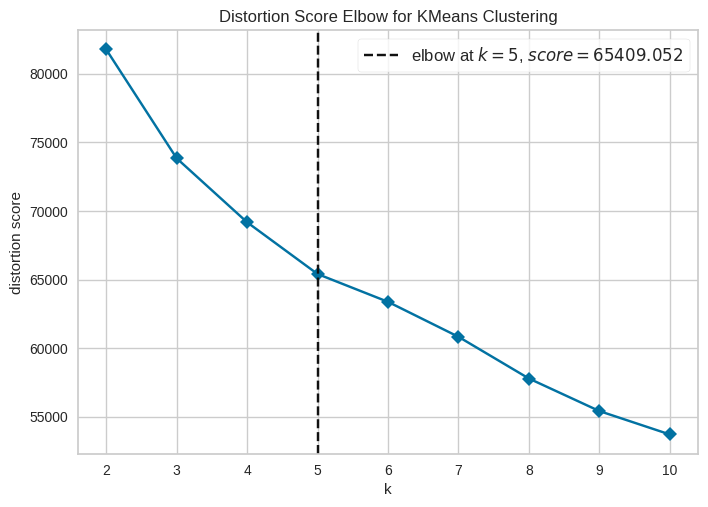

In [7]:
plot_model(kmeans,plot='elbow')
# K가 5일 때 가장 좋은 값인 것 같다고 판단

In [8]:
# 최적화된 클러스터 수로 모델 재생성
kmeans_optimized = create_model('kmeans',num_clusters=5)
# 5개의 클러스터로 만들어줘

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1088,121.7464,2.2425,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
# 클러스터 할당 및 분석
# 실제 데이터에 몇 번의 클러스터가 부여됐는지 확인하는 작업
kmeans_results = assign_model(kmeans_optimized)
kmeans_results
# 내 데이터에 실제로 predict을 해준다.
# 원래 데이터에 클러스터 각각 몇 번 했는지 알려주는 코드

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Cluster
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,Cluster 0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,Cluster 0
2,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,Cluster 0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,Cluster 1
4,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s,Cluster 3
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s,Cluster 3
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s,Cluster 3
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s,Cluster 3


In [10]:
plot_model(kmeans_optimized,plot='cluster')

"""
t-SNE는 고차원 데이터를 저차원 공간 (보통 2D 또는 3D)으로 시각화하는 데 사용되는
비선형 차원 감소 기법입니다.
특히 고밀도 데이터 영역에서 데이터 간의 거리를 잘 보존하면서 시각화하는 데 효과적입니다.
"""

In [11]:
plot_model(kmeans_optimized, plot = 'tsne')

In [12]:
cluster_summary = kmeans_results.groupby("Cluster").describe()
cluster_summary
# 616개의 컬럼들을 다 해석해야 한다.

DYRK1A_N                                                    \
             count      mean       std       min       25%       50%   
Cluster                                                                
Cluster 0    158.0  0.613021  0.424268  0.293219  0.422684  0.510669   
Cluster 1    266.0  0.564742  0.240274  0.259953  0.417039  0.510842   
Cluster 2    203.0  0.333855  0.086162  0.191464  0.272132  0.321613   
Cluster 3    190.0  0.332519  0.128023  0.145327  0.237241  0.289142   
Cluster 4    260.0  0.309875  0.068458  0.194417  0.270322  0.300032   

                              ITSN1_N            ...  H3MeK4_N            \
                75%       max   count      mean  ...       75%       max   
Cluster                                          ...                       
Cluster 0  0.615285  2.516367   158.0  0.864362  ...  0.180753  0.236145   
Cluster 1  0.642843  1.909073   266.0  0.753401  ...  0.205024  0.281511   
Cluster 2  0.366290  0.702608   203.0  0.499856  ...  0.297374  0.395820   
Cluster 3  0.407444  0.743112   190.0  0.484065  ...  0.249522  0.413903   
Cluster 4  0.343596  0.940956   260.0  0.516161  ...  0.220982  0.316426   

          CaNA_N                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
Cluster 0  158.0  1.553965  0.288828  0.887000  1.340114  1.609224  1.727276   
Cluster 1  269.0  1.643594  0.182989  1.026348  1.521328  1.625196  1.778196   
Cluster 2  203.0  1.107625  0.227400  0.586479  0.983966  1.103787  1.270678   
Cluster 3  190.0  1.247554  0.249826  0.788462  1.060242  1.226494  1.424564   
Cluster 4  260.0  1.135654  0.183671  0.627581  0.999089  1.099576  1.260235   

                     
                max  
Cluster              
Cluster 0  2.115555  
Cluster 1  2.129791  
Cluster 2  1.730159  
Cluster 3  1.903448  
Cluster 4  1.817862  

[5 rows x 616 columns]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

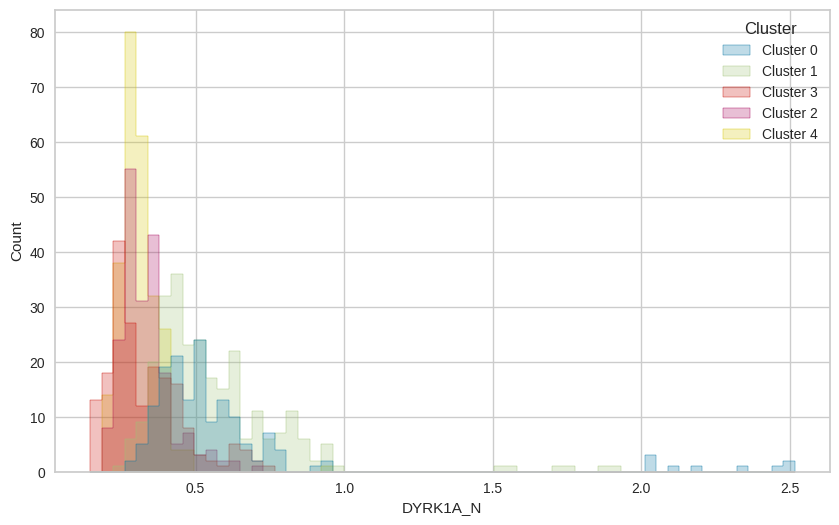

In [14]:
# 클러스터별 주요 마커 히스토그램
for marker in ["DYRK1A_N"]: # 이게 되게 중요한 컬럼
    plt.figure(figsize=(10, 6))
    sns.histplot(data=kmeans_results,
               x=marker,
               hue="Cluster",
               element="step")
    plt.show()